In [1]:
import os
import pickle

import numpy as np
import pandas as pd
pd.options.display.max_columns = None

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'/Users/cock/kDrive/PhD/Projects/Labs/blind-mitigation/notebooks/0_data_processing'

In [3]:
cd ../../data/tuglet/raw/

/Users/cock/kDrive/PhD/Projects/Labs/blind-mitigation/data/tuglet/raw


In [4]:
from bilalcode.utils.load_data import load_data, load_posttest
from bilalcode.utils.preprocess import preprocess

# Data

## demographics

In [5]:
demographics_rancho = pd.read_csv('./demographics_rancho.csv', encoding='Windows-1252', header=None, index_col=None)
rancho_columns_of_interest = {
    10: 'username', 11: 'learner_id', 12: 'gender'
}
demographics_rancho = demographics_rancho.rename(columns=rancho_columns_of_interest)
demographics_rancho = demographics_rancho[rancho_columns_of_interest.values()]

demographics_rancho_bis = pd.read_csv('./studentInfo_rancho.csv', encoding='Windows-1252', header=0, index_col=None)
rancho_bis_columns_of_interest = {
    'Student Id': 'username', 'Passed Game?': 'passed_game', 'Cluster Label': 'cluster', 
    'Posttest Score': 'posttest_score'
}
demographics_rancho_bis = demographics_rancho_bis.rename(columns=rancho_bis_columns_of_interest)
demographics_rancho_bis = demographics_rancho_bis[rancho_bis_columns_of_interest.values()]

print('before merge: {}'.format(len(demographics_rancho)))
demographics_rancho = demographics_rancho.merge(demographics_rancho_bis, how='left', on='username')
print('after merge: {}'.format(len(demographics_rancho)))


demographics_rancho.head()

before merge: 135
after merge: 135


,username,learner_id,gender,passed_game,cluster,posttest_score
0,abigailv,81692,F,passed,1.0,4.0
1,alaind,62469,M,passed,2.0,3.0
2,alyssah,63404,F,failed,3.0,-1.0
3,alyssat,65083,F,passed,3.0,2.0
4,amyr,62200,F,NaN,NaN,NaN


In [6]:
demographics_tierra = pd.read_csv('./demographics_tierra.csv', encoding='Windows-1252', header=None, index_col=None)
tierra_columns_of_interest = {
    0: 'username', 4: 'gender'
}
demographics_tierra = demographics_tierra.rename(columns=tierra_columns_of_interest)
demographics_tierra = demographics_tierra[tierra_columns_of_interest.values()]

demographics_tierra_bis = pd.read_csv('./studentInfo_tl.csv', encoding='Windows-1252', header=0, index_col=None)
tierra_bis_columns_of_interest = {
    'Student Id': 'username', 'Passed Game?': 'passed_game', 'Cluster Label': 'cluster', 
    'Posttest Score': 'posttest_score'
}
demographics_tierra_bis = demographics_tierra_bis.rename(columns=tierra_bis_columns_of_interest)
demographics_tierra_bis = demographics_tierra_bis[tierra_bis_columns_of_interest.values()]

print('before merge: {}'.format(len(demographics_tierra)))
demographics_tierra = demographics_tierra.merge(demographics_tierra_bis, how='left', on='username')
print('after merge: {}'.format(len(demographics_tierra)))

demographics_tierra.head()

before merge: 153
after merge: 153


,username,gender,passed_game,cluster,posttest_score
0,amberf1,f,passed,1.0,4.0
1,avasina1,f,passed,2.0,4.0
2,devinc1,m,passed,1.0,0.0
3,emilyl1,f,passed,6.0,0.0
4,eoinc1,m,passed,1.0,3.0


In [7]:
na_rancho = demographics_rancho[demographics_rancho['cluster'].isna()]
na_tl = demographics_tierra[demographics_tierra['cluster'].isna()]
print(
    '{} students in the rancho group were not assigned a cluster, while that number is {} for tierra linda'.format(
    len(na_rancho), len(na_tl)
    )
)

na_rancho = demographics_rancho[demographics_rancho['gender'].isna()]
na_tl = demographics_tierra[demographics_tierra['gender'].isna()]
print(
    '{} students in the rancho group did not contain gender information, while that number is {} for tierra linda'.format(
    len(na_rancho), len(na_tl)
    )
)

4 students in the rancho group were not assigned a cluster, while that number is 6 for tierra linda
0 students in the rancho group did not contain gender information, while that number is 0 for tierra linda


In [8]:
demographics_rancho = demographics_rancho.dropna(axis=0, subset=['cluster'])
demographics_tierra = demographics_tierra.dropna(axis=0, subset=['cluster'])

demographics_rancho['area'] = ['rancho' for row in range(len(demographics_rancho))]
demographics_tierra['area'] = ['tierra_linda' for row in range(len(demographics_tierra))]

demographics = pd.concat([demographics_rancho, demographics_tierra])

usernames_demographics = demographics['username']

demographics.head()

,username,learner_id,gender,passed_game,cluster,posttest_score,area
0,abigailv,81692.0,F,passed,1.0,4.0,rancho
1,alaind,62469.0,M,passed,2.0,3.0,rancho
2,alyssah,63404.0,F,failed,3.0,-1.0,rancho
3,alyssat,65083.0,F,passed,3.0,2.0,rancho
5,angelm,62787.0,M,passed,5.0,1.0,rancho


## behavioural data
For this part of the pre-processing, we're using Bilal's code (summer 2021) available here:https://github.com/epfl-ml4ed/tuglet-student-modelling/blob/main/utils/load_data.py

In [9]:
bilal_combined = pd.read_csv('./bilalcode/data/tuglet_combined.csv', header=None)
bilal_combined.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,amberf1,Intro,Enter,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,amberf1,Intro,Hypothesis,10204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,amberf1,Intro,Hypothesis,25326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,amberf1,Intro,Cleared,30566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,amberf1,Intro,Hypothesis,43449,1.5,0.5,0.0,0.0,0.0,0.0,0.5,1.5,0


In [ ]:
# # with open('../features/bilal_explore_challenge_rules_setup_time_label_tuglet.pkl', 'wb') as fp:
# #     pickle.dump(full_data, fp)

# # Load data 
# args = {
#     'explore': True,
#     'challenge': True,
#     'rules': True,
#     'setup': True,
#     'time': True,
#     'label': True,
#     'old_score': False
# }
# data = load_data(args['explore'], args['challenge'], args['rules'], args['setup'], args['time'], args['label'])
# posttest_data = load_posttest(args['old_score'])

# # filter data with cluster and demographics information
# data = data[data['user_id'].isin(usernames_demographics)]
# final_usernames = list(data['user_id'])

# # Pre-processing the data
# (x, y), preprocessed_usernames = preprocess(data, posttest_data, args['old_score'])
# y = [yy[0]*10 for yy in y]

In [10]:
# with open('../features/bilal_explore_challenge_setup_time_tuglet_old.pkl', 'wb') as fp:
#     pickle.dump(full_data, fp)
# Load data 
args = {
    'explore': True,
    'challenge': True,
    'rules': False,
    'setup': True,
    'time': True,
    'label': False,
    'old_score': True
}
data = load_data(args['explore'], args['challenge'], args['rules'], args['setup'], args['time'], args['label'])
posttest_data = load_posttest(args['old_score'])

# filter data with cluster and demographics information
data = data[data['user_id'].isin(usernames_demographics)]
final_usernames = list(data['user_id'])

# Pre-processing the data
(x, y), preprocessed_usernames = preprocess(data, posttest_data, args['old_score'])
y = [yy[0]*4 for yy in y]

In [10]:
# with open('../features/bilal_explore_challenge_rules_setup_time_old_tuglet.pkl', 'wb') as fp:
#     pickle.dump(full_data, fp)
# Load data 
args = {
    'explore': True,
    'challenge': True,
    'rules': True,
    'setup': True,
    'time': True,
    'label': False,
    'old_score': True
}
data = load_data(args['explore'], args['challenge'], args['rules'], args['setup'], args['time'], args['label'])
posttest_data = load_posttest(args['old_score'])

# filter data with cluster and demographics information
data = data[data['user_id'].isin(usernames_demographics)]
final_usernames = list(data['user_id'])

# Pre-processing the data
(x, y), preprocessed_usernames = preprocess(data, posttest_data, args['old_score'])
y = [yy[0]*4 for yy in y]

In [10]:
# with open('../features/bilal_explore_challenge_rules_setup_time_label_old_tuglet.pkl', 'wb') as fp:
#     pickle.dump(full_data, fp)
# Load data 
args = {
    'explore': True,
    'challenge': True,
    'rules': True,
    'setup': True,
    'time': True,
    'label': True,
    'old_score': True
}
data = load_data(args['explore'], args['challenge'], args['rules'], args['setup'], args['time'], args['label'])
posttest_data = load_posttest(args['old_score'])

# filter data with cluster and demographics information
data = data[data['user_id'].isin(usernames_demographics)]
final_usernames = list(data['user_id'])

# Pre-processing the data
(x, y), preprocessed_usernames = preprocess(data, posttest_data, args['old_score'])
y = [yy[0]*4 for yy in y]

In [10]:
print('{} students have demographics information.'.format(len(usernames_demographics)))
print('     input shape: {}'.format(x.shape))
print('     output shape: {}'.format(np.array(y).shape))

278 students have demographics information.
     input shape: (264, 152, 12)
     output shape: (264,)


# Create Data 

In [12]:
demographics.head()

,username,learner_id,gender,passed_game,cluster,posttest_score,area
0,abigailv,81692.0,F,passed,1.0,4.0,rancho
1,alaind,62469.0,M,passed,2.0,3.0,rancho
2,alyssah,63404.0,F,failed,3.0,-1.0,rancho
3,alyssat,65083.0,F,passed,3.0,2.0,rancho
5,angelm,62787.0,M,passed,5.0,1.0,rancho


In [11]:
full_data = {}

j = 0
for i, lid in enumerate(preprocessed_usernames):
    
    try:
    
        row = demographics[demographics['username'] == lid]
        assert len(row) == 1
        
        row = dict(row.iloc[0])
    except AssertionError:
        if lid == 'carolynw5' or lid == 'dogukank3' or lid == 'meeraj1':
            row = dict(row.iloc[0])
            row['gender'] = 'na'
            
        elif lid == 'garrettm2' or lid == 'jessicak6' or lid == 'reidr2':
            row = dict(row.iloc[0])
            
        else:
            print(lid)
            print('*')
            print(row)
            print('  _. ')
    
    
    student = {
        'sequence': x[i],
        'idx': j,
        'learner_id': lid,
        'gender': row['gender'].lower(),
        'passed_game': row['passed_game'],
        'cluster': row['cluster'],
        'posttest_score': row['posttest_score'],
        'area': row['area'],
        'label': y[i],
    }
    full_data[j] = student
    j += 1
    
full_data['available_demographics'] = [
    'gender', 'passed_game', 'cluster', 'posttest_score', 'area'
] 

In [12]:
len(full_data)

265

In [12]:
with open('../features/bilal_explore_challenge_rules_setup_time_label_oldposttest_tuglet.pkl', 'wb') as fp:
    pickle.dump(full_data, fp)

In [13]:
full_data = {}

j = 0
for i, lid in enumerate(preprocessed_usernames):
    
    try:
    
        row = demographics[demographics['username'] == lid]
        assert len(row) == 1
        
        row = dict(row.iloc[0])
    except AssertionError:
        if lid == 'carolynw5' or lid == 'dogukank3' or lid == 'meeraj1':
            row = dict(row.iloc[0])
            row['gender'] = 'na'
            
        elif lid == 'garrettm2' or lid == 'jessicak6' or lid == 'reidr2':
            row = dict(row.iloc[0])
            
        else:
            print(lid)
            print('*')
            print(row)
            print('  _. ')
    
    
    student = {
        'sequence': x[i],
        'idx': j,
        'learner_id': lid,
        'gender': row['gender'].lower(),
        'passed_game': row['passed_game'],
        'cluster': row['cluster'],
        'posttest_score': row['posttest_score'],
        'area': row['area'],
        'label': int(y[i] > 2),
    }
    full_data[j] = student
    j += 1
    
full_data['available_demographics'] = [
    'gender', 'passed_game', 'cluster', 'posttest_score', 'area'
] 

In [14]:
with open('../features/bilal_explore_challenge_rules_setup_time_label_oldposttest_binary_tuglet.pkl', 'wb') as fp:
    pickle.dump(full_data, fp)

# EDA

In [13]:
eda_demographics = demographics[demographics['username'].isin(final_usernames)]
eda_demographics.head()

,username,learner_id,gender,passed_game,cluster,posttest_score,area
0,abigailv,81692.0,F,passed,1.0,4.0,rancho
1,alaind,62469.0,M,passed,2.0,3.0,rancho
3,alyssat,65083.0,F,passed,3.0,2.0,rancho
5,angelm,62787.0,M,passed,5.0,1.0,rancho
6,angelinaz,83364.0,F,passed,6.0,0.0,rancho


In [15]:
eda_demographics['area'].unique()

array(['rancho', 'tierra_linda'], dtype=object)

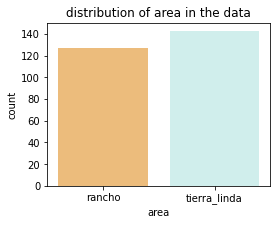

In [16]:
eda_demographics['area'] = eda_demographics.apply(lambda row: row['area'].lower(), axis=1)
plt.figure(figsize=(4, 3))
sns.countplot(
    eda_demographics['area'],
    palette = {'rancho': '#ffbf69', 'tierra_linda': '#cbf3f0'}
)
plt.title('distribution of area in the data')
plt.show()

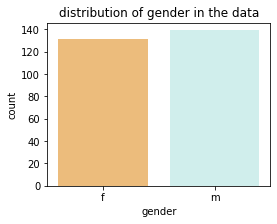

In [17]:
eda_demographics['gender'] = eda_demographics.apply(lambda row: row['gender'].lower(), axis=1)
plt.figure(figsize=(4, 3))
sns.countplot(
    eda_demographics['gender'],
    palette = {'f': '#ffbf69', 'm': '#cbf3f0'}
)
plt.title('distribution of gender in the data')
plt.show()

In [18]:
eda_demographics['cluster'].unique()

array([1., 2., 3., 5., 6., 4.])

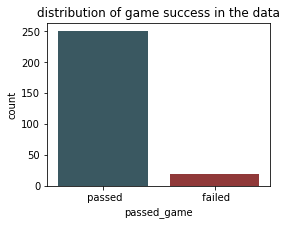

In [19]:
eda_demographics['passed_game'] = eda_demographics.apply(lambda row: row['passed_game'].lower(), axis=1)
plt.figure(figsize=(4, 3))
sns.countplot(
    eda_demographics['passed_game'],
    palette = {' passed': '#335c67', ' failed': '#9e2a2b'}
)
plt.title('distribution of game success in the data')
plt.show()

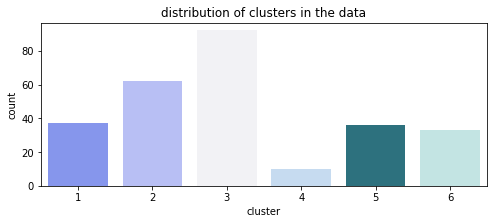

In [20]:
eda_demographics['cluster'] = eda_demographics.apply(lambda row: str(int(row['cluster'])), axis=1)
eda_demographics = eda_demographics.sort_values('cluster')
plt.figure(figsize=(8, 3))
sns.countplot(
    eda_demographics['cluster'],
    palette = {
        '0': '#27187e', '1': '#758bfd', '2': '#aeb8fe', '3': '#f1f2f6', 
        '4': '#bfdbf7', '5': '#1f7a8c', '6': '#bee9e8'
    }
)
plt.title('distribution of clusters in the data')
plt.show()

In [19]:
from tensorflow.keras.utils import to_categorical

In [18]:
a = [3, 4, 5, 4, 4, 4]

In [18]:
np.unique(y)

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])